# VacationPy
----

#### Note
* Monitor API usage: https://developers.google.com/maps/reporting/gmp-reporting


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os

# Additions
#import gmaps.datasets

# Import API key
from api_keys import g_key

### Store Part I results into DataFrame
* Load the csv exported in Part I to a DataFrame

In [2]:
# Load csv from WeatherPy
# Note: Run .head() to confirm data

weather_file_df = ("../output_data/weather_globalcities.csv")
weather_df = pd.read_csv(weather_file_df)
#weather_df.head()


### Humidity Heatmap
* Configure gmaps.
* Use the Lat and Lng as locations and Humidity as the weight.
* Add Heatmap layer to map.

In [3]:
# Configure gmaps with API key.
gmaps.configure(api_key=g_key)

In [4]:
# Store latitude and longitude into locations; with humidty as weight. 
# Note: Run .head() to confirm data
locations = weather_df[["lat", "lon"]].astype(float)
humidity = weather_df["humidity"].astype(float)
#locations.head()


In [5]:
# Create heatmap
# Note: had to install $pip install gmaps  -AND- $jupyter nbextension enable --py --sys-prefix gmaps
fig = gmaps.figure(center = [0,0] ,zoom_level = 2)

#Add heat layer 
heat_layer = gmaps.heatmap_layer(locations, weights=humidity,
                               dissipating=False, max_intensity=100,
                               point_radius = 2)
fig.add_layer(heat_layer)

#Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [6]:
print("Static heatmap is displayed below.")

Static heatmap is displayed below


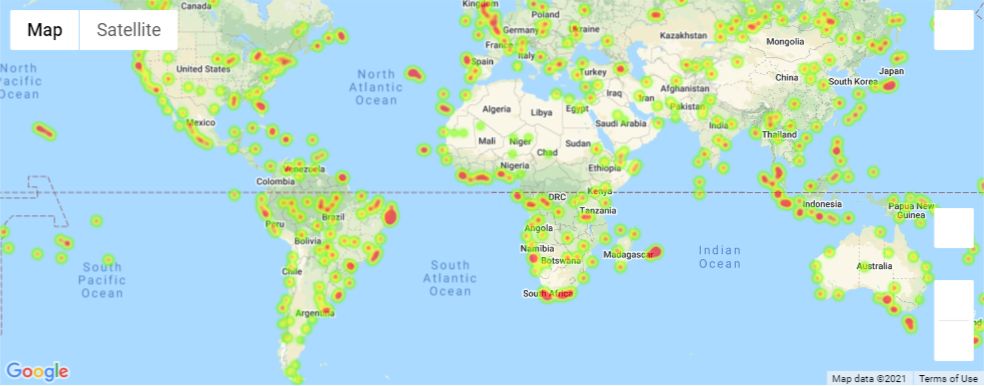

In [7]:
from IPython.display import Image
Image(filename="VacationPy_Heatmap.png") 

### Create new DataFrame fitting weather criteria
* Narrow down the cities to fit weather conditions.
* Drop any rows will null values.

In [8]:
# Narrow down above dataframe to include my ideal weather.
ideal_weather_df = weather_df

ideal_weather_df = ideal_weather_df.loc[(ideal_weather_df["temp_max"] < 55) & (ideal_weather_df["temp_max"] > 35)]
ideal_weather_df = ideal_weather_df.loc[(ideal_weather_df["cloudiness"] < 50) & (ideal_weather_df["cloudiness"] > 25)]
ideal_weather_df = ideal_weather_df.loc[ideal_weather_df["wind_speed"] < 10]


# Drop any rows with null values
ideal_weather_df = ideal_weather_df.dropna()

In [9]:
# Confirming <10 records per the instructions.
len(ideal_weather_df)

8

### Hotel Map
* Store into variable named `hotel_df`.
* Add a "Hotel Name" column to the DataFrame.
* Set parameters to search for hotels with 5000 meters.
* Hit the Google Places API for each city's coordinates.
* Store the first Hotel result into the DataFrame.
* Plot markers on top of the heatmap.

In [10]:
# Create a hotel dataframe to store hotel info from google search results.
hotel_df = ideal_weather_df

# Dictionary to update each iteration
# Note: Using "params" to build upon base URL below
params = {
    "radius": 5000,
    "types": "lodging",
    "key": g_key
}

# Note: For loop to go through all the data in ideal_weather_df
for index, row in hotel_df.iterrows():
    # get lat, lng from df
    lat = row["lat"]
    lon = row["lon"]

    # change location each iteration while leaving original params in place
    # Note: URL is for Google Places API
    params["location"] = f"{lat},{lon}"
    
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

    # assemble url and make API request
    # Note: Leave 'city' in single quotes. Code fails with double quotes.
    print(f"Finding hotels based on the city {row['city']} at data index {index}.")
    response = requests.get(base_url, params=params).json()
    # print(json.dumps(response, indent=4, sort_keys=True))
    
    # extract results
    results = response["results"]
    
    try:
        # Note: Leave 'name' in single quotes. Code fails with double quotes. Watch index references as well.
        print(f"The closest hotel is {results[0]['name']}.")
        hotel_df.loc[index, "Hotel Name"] = results[0]["name"]
        
    except (KeyError, IndexError):
        print("No result.")
        
    print("------------")

Finding hotels based on the city Katsuura at data index 127.
The closest hotel is Katsuura Hotel Mikazuki.
------------
Finding hotels based on the city Fortuna at data index 131.
The closest hotel is Super 8 by Wyndham Fortuna.
------------
Finding hotels based on the city Sitka at data index 365.
The closest hotel is Westmark Sitka.
------------
Finding hotels based on the city Arrondissement de Saint-Denis at data index 381.
The closest hotel is Appart'City Paris Clichy Mairie - Appart Hôtel.
------------
Finding hotels based on the city Hasaki at data index 452.
The closest hotel is Inubosaki Kanko Hotel.
------------
Finding hotels based on the city Were Īlu at data index 496.
No result.
------------
Finding hotels based on the city Eaglesfield at data index 519.
The closest hotel is Allerdale Court Hotel.
------------
Finding hotels based on the city Boddam at data index 561.
The closest hotel is Palace Hotel.
------------


In [11]:
# Note: Checking the data, just curious
#len(hotel_df)

In [12]:
# Note: Checking the data, just curious
hotel_df.head(10)

,Unnamed: 0,city,country,lat,lon,temp,temp_max,humidity,wind_speed,cloudiness,date,Hotel Name
127,127,Katsuura,JP,35.1333,140.3000,42.71,44.01,75,6.91,40,1611617942,Katsuura Hotel Mikazuki
131,131,Fortuna,US,40.5982,-124.1573,44.22,46.00,87,8.05,40,1611617943,Super 8 by Wyndham Fortuna
365,365,Sitka,US,57.0531,-135.3300,35.60,35.60,80,2.44,40,1611617996,Westmark Sitka
381,381,Arrondissement de Saint-Denis,FR,48.9167,2.3333,32.79,35.01,86,5.75,37,1611617999,Appart'City Paris Clichy Mairie - Appart Hôtel
452,452,Hasaki,JP,35.7333,140.8333,36.91,39.00,93,5.75,40,1611618016,Inubosaki Kanko Hotel
496,496,Were Īlu,ET,10.6000,39.4333,48.81,48.81,51,7.23,27,1611618024,NaN
519,519,Eaglesfield,GB,54.6406,-3.4044,35.01,35.01,92,1.01,46,1611618028,Allerdale Court Hotel
561,561,Boddam,GB,57.4667,-1.7833,33.60,35.01,86,9.22,32,1611618037,Palace Hotel


In [13]:
# Note: Code came with JN.
# ORIGINAL -- NOTE: Do not change any of the code in this cell

# Using the template add the hotel marks to the heatmap
info_box_template = """
<dl>
<dt>Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{city}</dd>
<dt>Country</dt><dd>{country}</dd>
</dl>
"""
# Store the DataFrame Row
# Note: be sure to update with your DataFrame name
hotel_info = [info_box_template.format(**row) for index, row in hotel_df.iterrows()]
locations = hotel_df[["lat", "lon"]]

In [14]:
# Add marker layer ontop of heat map
# Note: This is markers with city and hotel info displayed.

markers = gmaps.marker_layer(locations, info_box_content=[f"Hotel location: {rate}" for rate in hotel_info])

# Note: This is markers only. No city or hotel info is displayed.
#markers = gmaps.marker_layer(locations)

fig = gmaps.figure(center=(30, 5), zoom_level=2)
fig.add_layer(markers)
fig


Figure(layout=FigureLayout(height='420px'))

In [18]:
print("Static hotel map is displayed below (pins are not dynamic because map is only an image).")

Static hotel map is displayed below (pins are not dynamic because map is only an image).


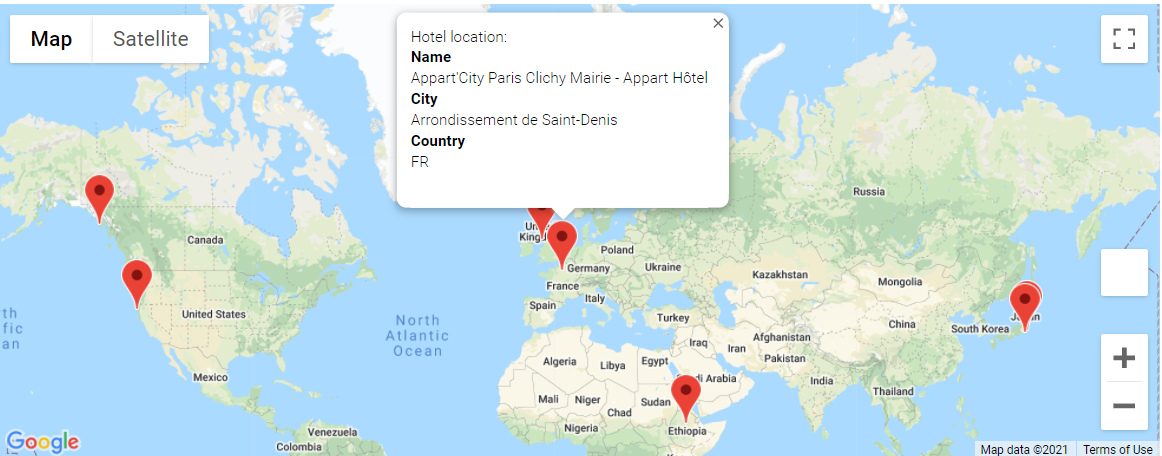

In [19]:
from IPython.display import Image
Image(filename="VacationPy_Hotelmap.png") 